Epoch 0: Loss= 2.3394, Accuracy= 12.47%
Epoch 10: Loss= 1.8536, Accuracy= 62.99%
Epoch 20: Loss= 1.4092, Accuracy= 74.31%
Epoch 30: Loss= 1.0829, Accuracy= 79.20%
Epoch 40: Loss= 0.8766, Accuracy= 82.22%
Epoch 50: Loss= 0.7460, Accuracy= 84.34%
Epoch 60: Loss= 0.6587, Accuracy= 85.71%
Epoch 70: Loss= 0.5969, Accuracy= 86.76%
Epoch 80: Loss= 0.5511, Accuracy= 87.26%
Epoch 90: Loss= 0.5158, Accuracy= 87.65%
Epoch 100: Loss= 0.4878, Accuracy= 88.03%
Epoch 110: Loss= 0.4649, Accuracy= 88.31%
Epoch 120: Loss= 0.4459, Accuracy= 88.65%
Epoch 130: Loss= 0.4297, Accuracy= 89.08%
Epoch 140: Loss= 0.4158, Accuracy= 89.31%
Epoch 150: Loss= 0.4038, Accuracy= 89.52%
Epoch 160: Loss= 0.3932, Accuracy= 89.78%
Epoch 170: Loss= 0.3837, Accuracy= 89.89%
Epoch 180: Loss= 0.3752, Accuracy= 89.98%
Epoch 190: Loss= 0.3676, Accuracy= 90.12%
Epoch 200: Loss= 0.3605, Accuracy= 90.23%
Epoch 210: Loss= 0.3541, Accuracy= 90.36%
Epoch 220: Loss= 0.3481, Accuracy= 90.58%
Epoch 230: Loss= 0.3426, Accuracy= 90.68%
Epo

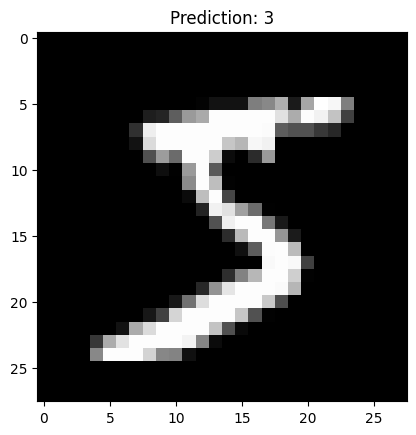

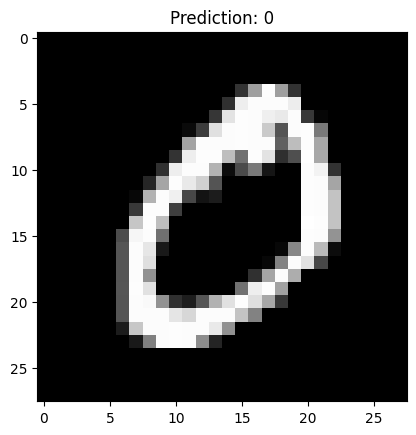

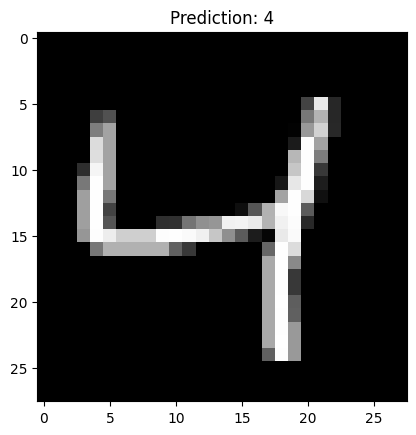

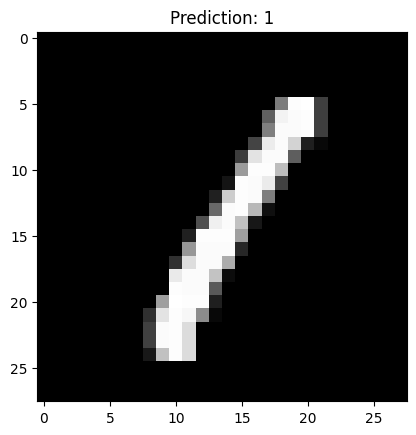

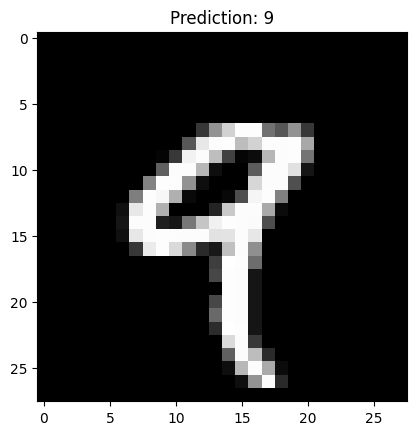

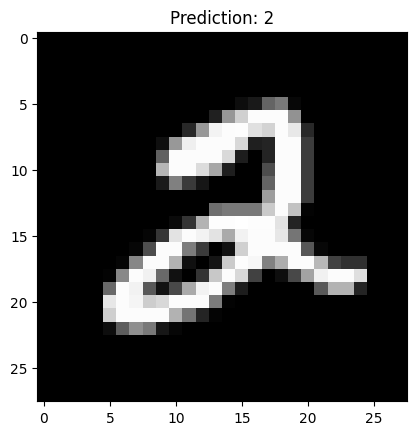

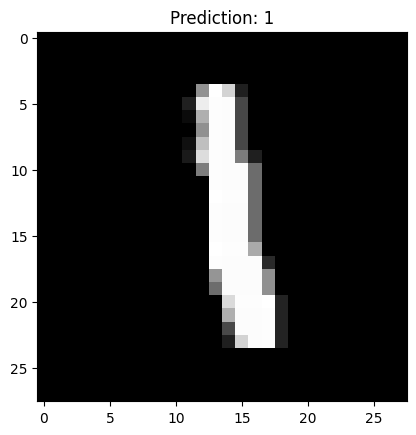

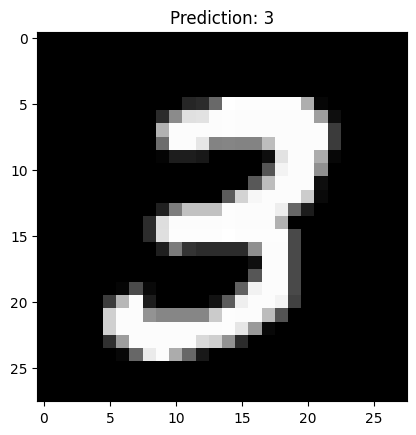

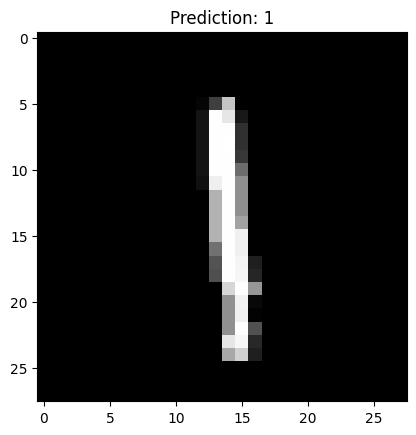

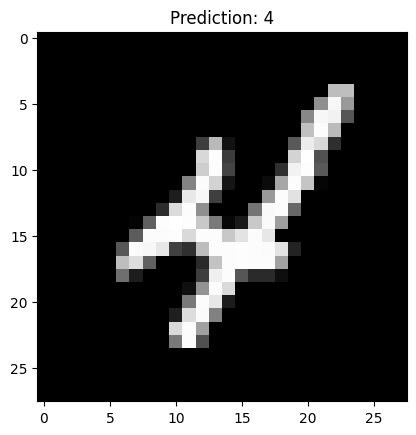

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train,Y_train),(_,_)=mnist.load_data()
X=X_train[:10000].reshape(10000,-1)/255
Y=Y_train[:10000]

def one_hot_encode(Y,num_classes=10):
  encoded=np.zeros((len(Y),num_classes))
  encoded[np.arange(len(Y)),Y]=1
  return encoded
Y_encoded=one_hot_encode(Y)

def relu(x):
  return np.maximum(0, x)

def relu_derivative(x):
  return (x > 0).astype(float)

def softmax(z):
  exp = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp / np.sum(exp, axis=1, keepdims=True)

def cross_entropy(y_pred, y_true):
  m=y_true.shape[0]
  log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)] + 1e-9)
  loss = np.sum(log_likelihood) / m
  return loss

input_size=784
hidden_size=128
output_size=10
lr=0.1
epochs=250

np.random.seed(42)
w1=np.random.randn(input_size,hidden_size)*np.sqrt(1/input_size)
b1=np.zeros((1,hidden_size))
w2=np.random.randn(hidden_size,output_size)*np.sqrt(1/hidden_size)
b2=np.zeros((1,output_size))

for epoch in range(epochs):
  z1=np.dot(X,w1)+b1
  a1=relu(z1)
  z2=np.dot(a1,w2)+b2
  a2=softmax(z2)
  loss=cross_entropy(a2,Y_encoded)

  #backward propagation
  dz2=a2-Y_encoded
  dw2=np.dot(a1.T,dz2)/X.shape[0]
  db2=np.sum(dz2,axis=0,keepdims=True)/X.shape[0]

  da1=np.dot(dz2,w2.T)
  dz1=da1*relu_derivative(z1)
  dw1=np.dot(X.T,dz1)/X.shape[0]
  db1=np.sum(dz1,axis=0,keepdims=True)/X.shape[0]
  #update
  w2-=lr*dw2
  b2-=lr*db2
  w1-=lr*dw1
  b1-=lr*db1

  if epoch % 10 == 0 or epoch == epochs - 1:
    predictions = np.argmax(a2, axis=1)
    accuracy = np.mean(predictions == Y)
    print(f"Epoch {epoch}: Loss= {loss:.4f}, Accuracy= {accuracy * 100:.2f}%")

#visualization
def visualize_predictions(X, Y, w1, b1, w2, b2):
  Z1 = np.dot(X, w1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, w2) + b2
  A2 = softmax(Z2)
  predictions = np.argmax(A2, axis=1)

  for i in range(10):
    img = X[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {predictions[i]}")
    plt.show()

visualize_predictions(X, Y, w1, b1, w2, b2)

In [12]:
print(f"Learning Rate: {lr}")
print(f"Number of Epochs: {epochs}")

Learning Rate: 0.01
Number of Epochs: 200
